# Import Libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [91]:
data = pd.read_csv('insurance.csv')

In [92]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
data['region'].value_counts() 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [94]:
data.replace({"sex":{"male":"1", "female":"0"}},inplace=True)
data.replace({"smoker":{"yes":"1", "no":"0"}},inplace=True)
data.replace({"region":{"southeast":"1", "southwest":"2", "northwest":"3", "northeast":"4"}},inplace=True)

C:\Users\Sameer\AppData\Local\Temp\ipykernel_9728\3098555946.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


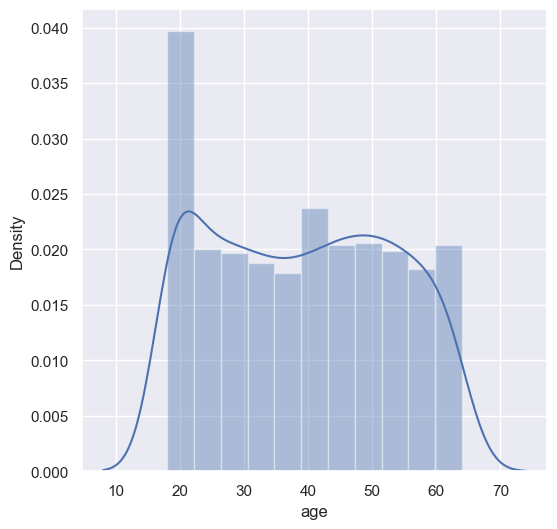

In [95]:
#Plot Age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.show()

C:\Users\Sameer\AppData\Local\Temp\ipykernel_9728\4187940014.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


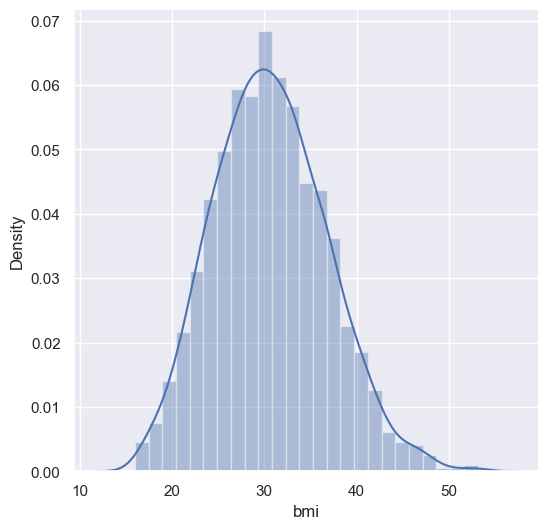

In [96]:
#Plot BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.show()

In [97]:
#Xy Split
X = data.iloc[:,0:6]
y = data['charges']

# Train Test Split

In [98]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 2)

# Import Regressors

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
lr = LinearRegression()
svm = SVR()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()

# Train Model

In [101]:
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

# Predict

In [102]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)

In [103]:
from sklearn.metrics import r2_score

In [104]:
score1 = r2_score(y_test,y_pred1)
score2 = r2_score(y_test,y_pred2)
score3 = r2_score(y_test,y_pred3)
score4 = r2_score(y_test,y_pred4)

In [105]:
print(score1), print(score2), print(score3), print(score4)

0.7454471618659976
-0.08037737323403293
0.8336445439667752
0.8683563046550278


(None, None, None, None)

In [106]:
data2 = {'age':40, 'sex':1, 'bmi':40.30, 'children':4, 'smoker':1, 'region':2 }
df = pd.DataFrame(data2, index=[0])
df_val = df.values

In [107]:
new_pred = gbr.predict(df_val)

C:\Users\Sameer\anaconda3\envs\insurance\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [108]:
new_pred

array([41406.60013041])

# Export 

In [110]:
import joblib
joblib.dump(gbr,'model_joblib_gr')

['model_joblib_gr']